In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn as skl

import seaborn as sns


import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

In [2]:
data = pd.read_csv('DDst.csv')
data

,age,bloodpressure,bloodsugar,BMI,weight,outcome
0,55,118,350,33.0,60,1
1,38,105,150,23.3,57,0
2,32,107,160,23.3,66,0
3,21,73,200,28.1,80,1
4,33,103,137,43.1,100,0
5,50,124,150,34.6,98,0
6,40,107,145,27.5,70,0
7,32,116,190,24.5,72,0
8,40,103,162,27.5,75,0
9,21,96,105,25.5,68,0


In [3]:
data.head()

,age,bloodpressure,bloodsugar,BMI,weight,outcome
0,55,118,350,33.0,60,1
1,38,105,150,23.3,57,0
2,32,107,160,23.3,66,0
3,21,73,200,28.1,80,1
4,33,103,137,43.1,100,0


In [4]:
data.tail()

,age,bloodpressure,bloodsugar,BMI,weight,outcome
42,53,117,178,32.3,92,0
43,64,125,181,35.9,98,0
44,68,90,196,31.4,89,0
45,71,100,193,40.0,93,0
46,42,104,199,38.0,98,0


In [5]:
data.shape

(47, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
age              47 non-null int64
bloodpressure    47 non-null int64
bloodsugar       47 non-null int64
BMI              47 non-null float64
weight           47 non-null int64
outcome          47 non-null int64
dtypes: float64(1), int64(5)
memory usage: 2.3 KB


In [7]:
data.describe()

,age,bloodpressure,bloodsugar,BMI,weight,outcome
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,47.425532,111.063830,181.531915,31.680851,84.000000,0.148936
std,16.363725,17.080887,46.653604,5.435857,13.085006,0.359875
min,16.000000,73.000000,105.000000,23.300000,57.000000,0.000000
25%,33.500000,101.500000,161.000000,28.100000,73.500000,0.000000
50%,47.000000,108.000000,178.000000,30.500000,87.000000,0.000000
75%,57.500000,122.500000,192.000000,34.800000,96.000000,0.000000
max,81.000000,145.000000,380.000000,45.800000,102.000000,1.000000


In [8]:
data.values

array([[ 55. , 118. , 350. ,  33. ,  60. ,   1. ],
       [ 38. , 105. , 150. ,  23.3,  57. ,   0. ],
       [ 32. , 107. , 160. ,  23.3,  66. ,   0. ],
       [ 21. ,  73. , 200. ,  28.1,  80. ,   1. ],
       [ 33. , 103. , 137. ,  43.1, 100. ,   0. ],
       [ 50. , 124. , 150. ,  34.6,  98. ,   0. ],
       [ 40. , 107. , 145. ,  27.5,  70. ,   0. ],
       [ 32. , 116. , 190. ,  24.5,  72. ,   0. ],
       [ 40. , 103. , 162. ,  27.5,  75. ,   0. ],
       [ 21. ,  96. , 105. ,  25.5,  68. ,   0. ],
       [ 33. , 118. , 160. ,  28.1,  80. ,   0. ],
       [ 26. , 131. , 187. ,  45.3,  88. ,   0. ],
       [ 26. , 103. , 132. ,  35.5,  80. ,   0. ],
       [ 29. , 107. , 128. ,  30.5,  70. ,   0. ],
       [ 53. , 137. , 210. ,  37.8,  95. ,   1. ],
       [ 55. , 125. , 146. ,  40. ,  90. ,   0. ],
       [ 31. , 120. , 198. ,  45.8, 100. ,   0. ],
       [ 69. , 114. , 178. ,  32.6,  99. ,   0. ],
       [ 52. ,  81. , 214. ,  31. ,  95. ,   1. ],
       [ 46. ,  98. , 162. ,  3

In [9]:
data.isnull().values.any()
#check if any value is null

False

In [10]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{
    border: 1px black solid !important;
    color: black !important
    }
</style>

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


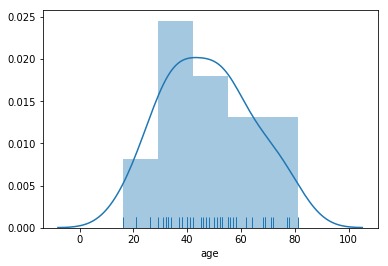

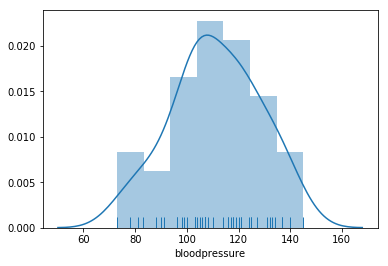

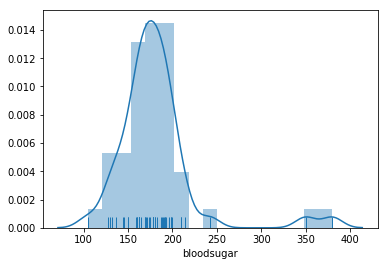

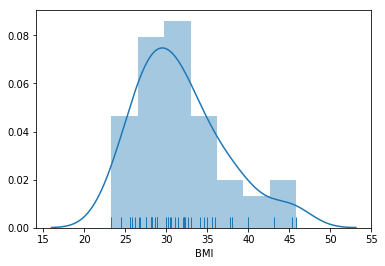

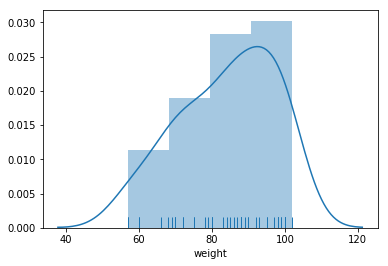

In [11]:
#Histogram plot
for i,col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.distplot(data[col], rug=True);

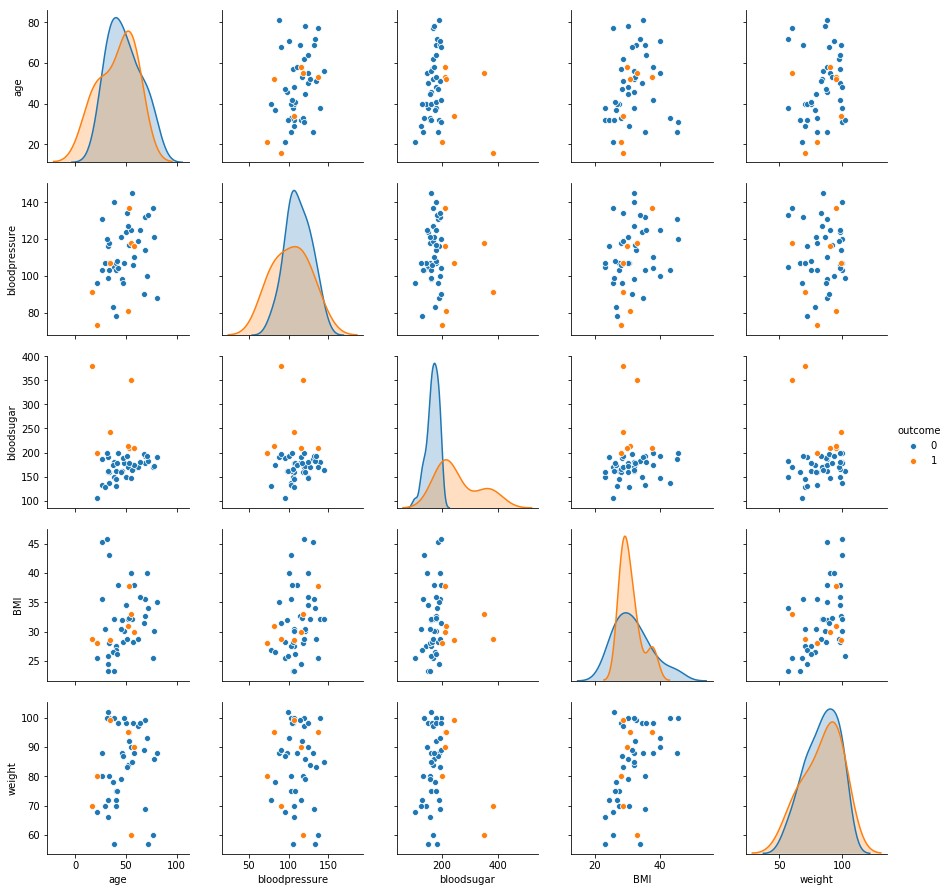

In [12]:
sns.pairplot(data, hue='outcome', diag_kind = 'auto', vars = ['age', 'bloodpressure', 'bloodsugar', 'BMI', 'weight']);

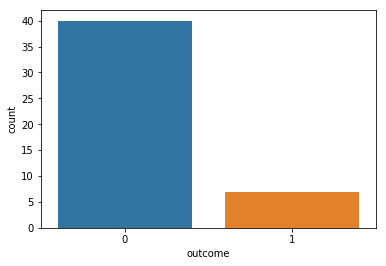

In [13]:
sns.countplot(data['outcome'])

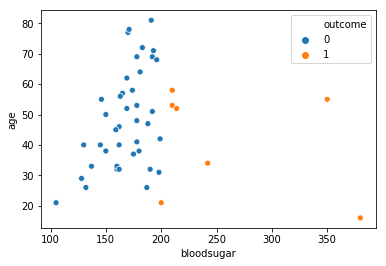

In [14]:
sns.scatterplot(x = 'bloodsugar', y = 'age', hue = 'outcome', data = data)

In [15]:
#data correlation table
data.corr()

,age,bloodpressure,bloodsugar,BMI,weight,outcome
age,1.000000,0.318396,0.002858,0.157362,0.107214,-0.158658
bloodpressure,0.318396,1.000000,-0.038836,0.280693,0.019939,-0.192554
bloodsugar,0.002858,-0.038836,1.000000,0.063038,-0.066272,0.693081
BMI,0.157362,0.280693,0.063038,1.000000,0.454568,-0.049629
weight,0.107214,0.019939,-0.066272,0.454568,1.000000,0.004617
outcome,-0.158658,-0.192554,0.693081,-0.049629,0.004617,1.000000


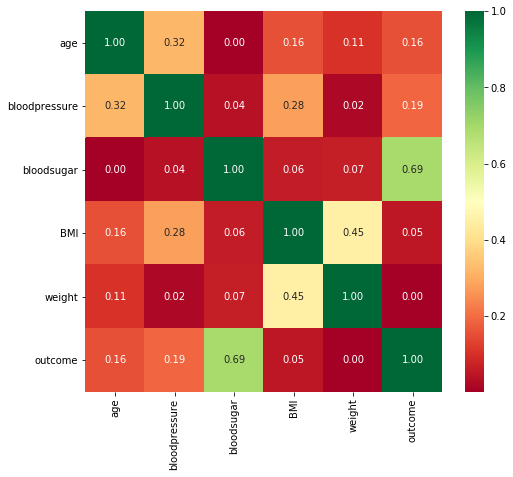

In [16]:
#correlation plot heatmap
plt.figure(figsize=(8,7))
sns.heatmap(np.abs(data.corr()), annot=True, cmap='RdYlGn', fmt='0.2f');

In [17]:
# data covariance table
data.cov()

,age,bloodpressure,bloodsugar,BMI,weight,outcome
age,267.771508,88.993987,2.181776,13.997456,22.956522,-0.934320
bloodpressure,88.993987,291.756707,-30.947734,26.062118,4.456522,-1.183626
bloodsugar,2.181776,-30.947734,2176.558742,15.986494,-40.456522,11.636448
BMI,13.997456,26.062118,15.986494,29.548538,32.332609,-0.097086
weight,22.956522,4.456522,-40.456522,32.332609,171.217391,0.021739
outcome,-0.934320,-1.183626,11.636448,-0.097086,0.021739,0.129510


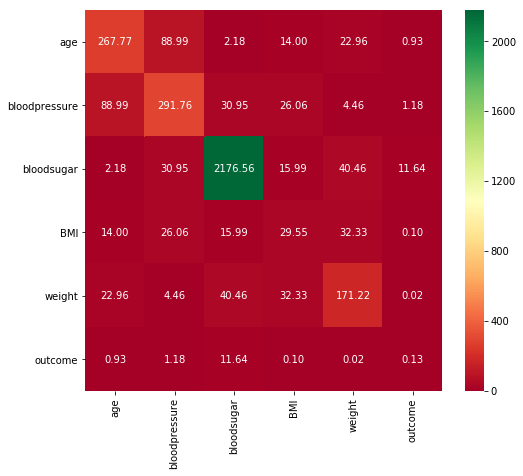

In [18]:
#covariance plot heatmap
plt.figure(figsize=(8,7))
sns.heatmap(np.abs(data.cov()), annot=True, cmap='RdYlGn', fmt='0.2f');

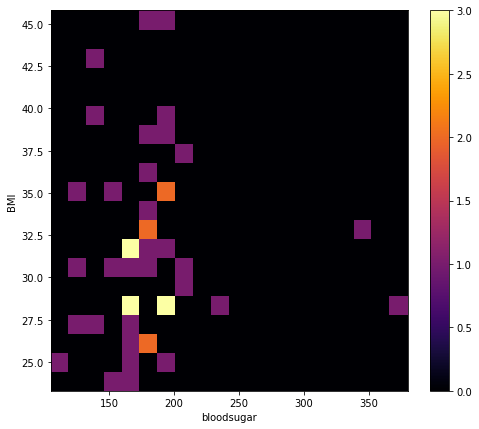

In [19]:
#2d Histogram
plt.figure(figsize=(8,7))
plt.hist2d(data['bloodsugar'], data['BMI'], bins=(20,20), cmap='inferno')
plt.xlabel('bloodsugar')
plt.ylabel('BMI')
plt.colorbar();

In [20]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [21]:
x.head()

,age,bloodpressure,bloodsugar,BMI,weight
0,55,118,350,33.0,60
1,38,105,150,23.3,57
2,32,107,160,23.3,66
3,21,73,200,28.1,80
4,33,103,137,43.1,100


In [22]:
y.head()

,outcome
0,1
1,0
2,0
3,1
4,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# SVM MODEL.....

In [26]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', random_state=7)
svclassifier.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=7,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svclassifier.predict(x_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error, mean_squared_error

In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_absolute_error (y_test, y_pred)))

[[8 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         2

   micro avg       0.90      0.90      0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10

Accuracy: 0.9
Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794


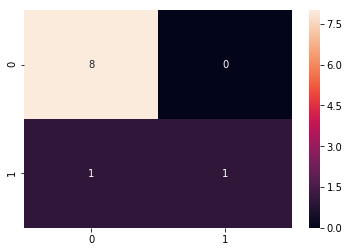

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# Using RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

In [33]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [34]:
x.head()

,age,bloodpressure,bloodsugar,BMI,weight
0,55,118,350,33.0,60
1,38,105,150,23.3,57
2,32,107,160,23.3,66
3,21,73,200,28.1,80
4,33,103,137,43.1,100


In [35]:
y

,outcome
0,1
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [37]:
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 3)
classifier.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_absolute_error (y_test, y_pred)))

[[9 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


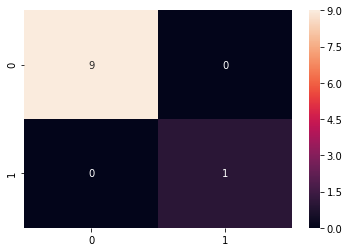

In [40]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True)

In [41]:
feature_imp = pd.Series (classifier.feature_importances_,index = x.columns).sort_values (ascending = False)
feature_imp

bloodsugar       0.730216
age              0.124917
bloodpressure    0.054467
weight           0.048682
BMI              0.041718
dtype: float64

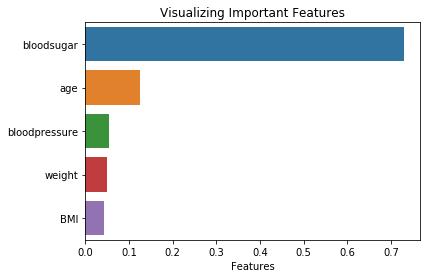

In [42]:
sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# Using KNN...

In [43]:
#Using KNN Classifier
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(data.drop('outcome', axis = 1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
scaled_features = scaler.transform(data.drop('outcome', axis = 1))
sc_data = pd.DataFrame(scaled_features, columns = data.columns[:-1])
sc_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,age,bloodpressure,bloodsugar,BMI,weight
0,0.467886,0.410468,3.650081,0.245299,-1.853990
1,-0.582229,-0.358845,-0.683180,-1.558440,-2.085738
2,-0.952858,-0.240489,-0.466517,-1.558440,-1.390492
3,-1.632344,-2.252538,0.400135,-0.665868,-0.308998
4,-0.891086,-0.477201,-0.964842,2.123419,1.235993


In [47]:
data['outcome']

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    1
19    0
20    1
21    1
22    1
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
Name: outcome, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


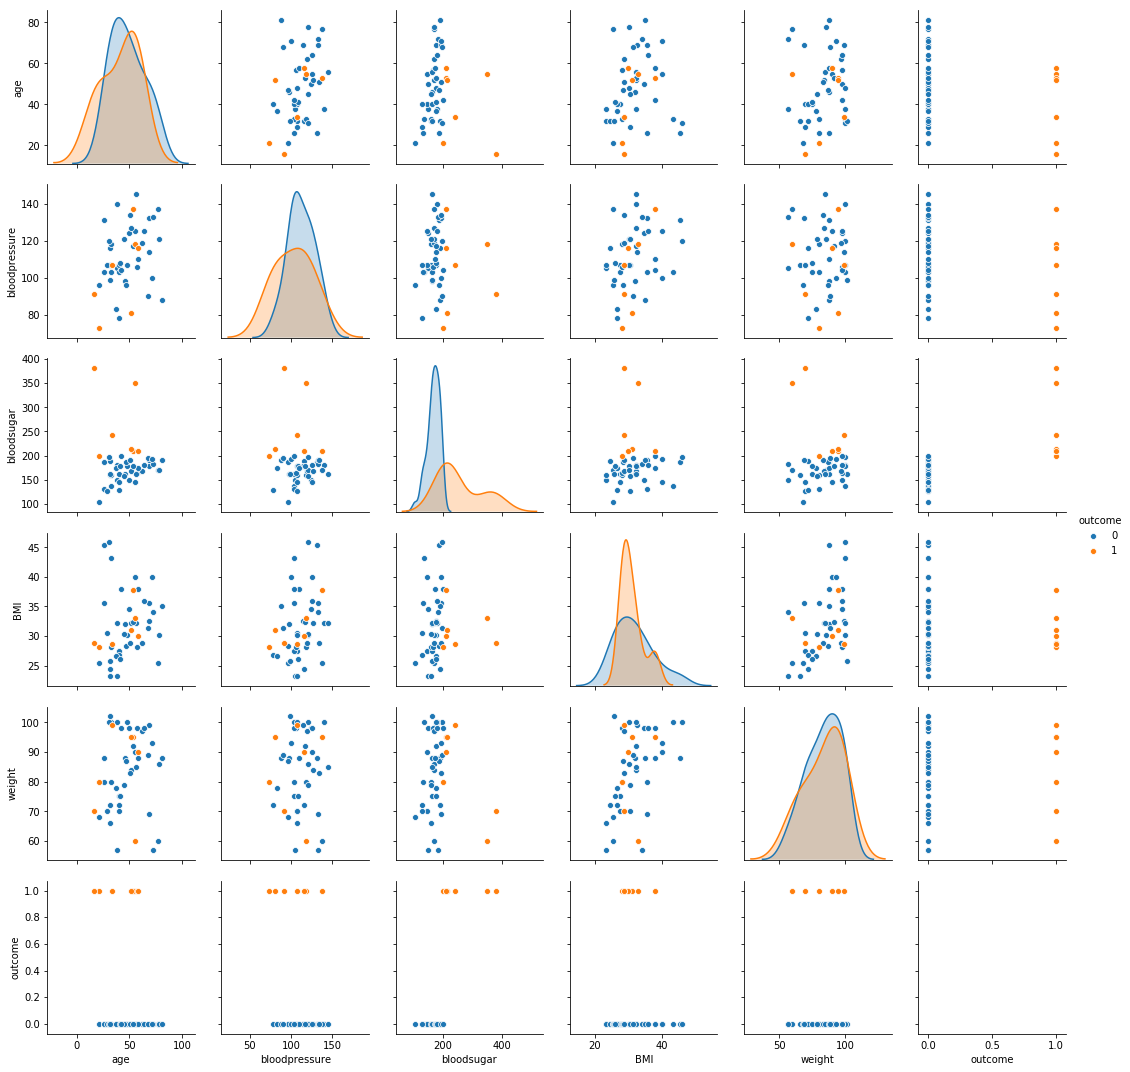

In [48]:
import seaborn as sns
sns.pairplot(data, hue= 'outcome')

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (scaled_features, data['outcome'], test_size = 0.2)

In [50]:
#Initialize an energy that stores the error rate
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [52]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [53]:
pred = knn.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

In [55]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('Accuracy:', accuracy_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, pred))
print('Mean Squared Error:', mean_squared_error (y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error (y_test, pred)))

[[8 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

   micro avg       0.80      0.80      0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10

Accuracy: 0.8
Mean Absolute Error: 0.2
Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Using Decision Tree...

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20)

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse', random_state=100, max_depth=4, min_samples_leaf=1)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [60]:
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz (regressor, out_file = 'reg_tree.dot')

In [61]:
y_pred = regressor.predict(x_test)

In [63]:
print(y_pred)
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
    outcome
41        0
46        0
24        0
15        0
34        0
10        0
42        0
17        0
20        1
40        0


In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error

In [68]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

[[9 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Accuracy:  1.0
Root Mean Squared Error:  0.0


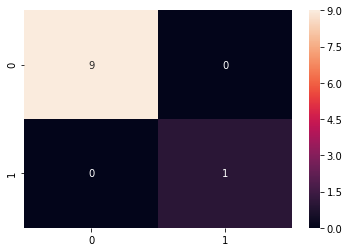

In [70]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True)